In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
output_dir = os.path.join(os.path.curdir, 'output') 

In [261]:
from bayesfilt import KalmanFilter, UnscentedKalmanFilter, ExtendedKalmanFilter
from bayesfilt import ConstantVelocityND, LinearObservationModel
from bayesfilt import CTRV, CTRA

## Observations

In [308]:
t = np.load(os.path.join(output_dir, 'tlist.npy'))
yobs = np.load(os.path.join(output_dir, 'yobs.npy'))
ytrue = np.load(os.path.join(output_dir, 'ytrue.npy'))

## CTRV

In [324]:
#observed = {0:0, 1:1} # observation-state pairs
observed = {0:0, 1:1, 2:2, 3:3} # observation-state pairs
truth = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5} # truth-state pairs
dt = 0.002
start_x = [yobs[0,0], yobs[1,0], yobs[2,0], yobs[3,0], 0.0, 0.0]
start_P = np.diag([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
mm = CTRA()
mm.update(dt = dt, sigmas = [0.01, 0.01])
om = LinearObservationModel(nx=mm.nx, observed=observed)
om.update(sigmas=[0.1, 0.1, 0.1, 0.1])

## UKF

In [325]:
# ukf = UnscentedKalmanFilter(nx=mm.nx, ny = om.ny, dt = dt, alpha=0.01, beta=1.)
# ukf.f = mm.f
# ukf.Q = mm.compute_Q().copy()
# ukf.h = om.h
# ukf.R = om.R.copy()
# ukf.initiate_state(t[0], start_x, start_P)
# ukf.filter(t[1:], [ix for ix in yobs[:,1:].T])
# # #ukf.smoother()
# # print(ukf.metrics)
# # print(ukf.metrics_smoother)

## EKF

In [326]:
ekf = ExtendedKalmanFilter(nx=mm.nx, ny = om.ny, dt = dt)
ekf.f = mm.f
ekf.compute_F = mm.compute_F
ekf.compute_G = mm.compute_G
ekf.compute_Q = mm.compute_Q
ekf.h = om.h
ekf.compute_H = om.compute_H
ekf.compute_J = om.compute_J
ekf.R = om.R.copy()
ekf.initiate_state(t[0], start_x, start_P)
ekf.filter(t[1:], [ix for ix in yobs[:,1:].T])
#ekf.smoother()
print(ekf.metrics)
#print(ekf.metrics_smoother)

{'nis': 6787.095, 'nees': 196.749, 'loglik': -1759.395}


In [327]:
print(ukf.metrics == ekf.metrics)

False


## Compare

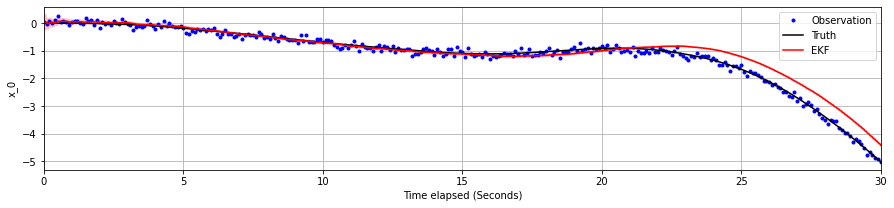

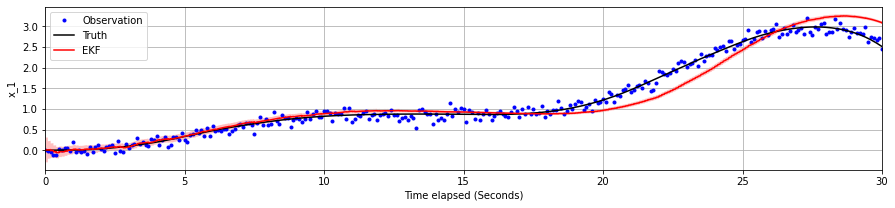

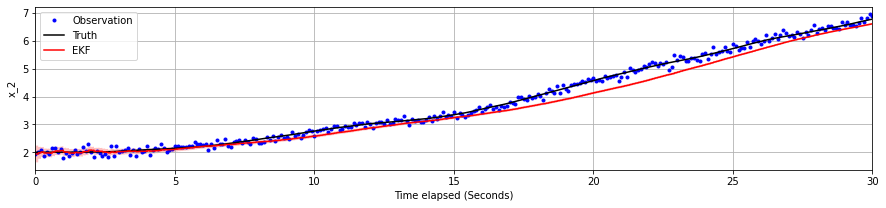

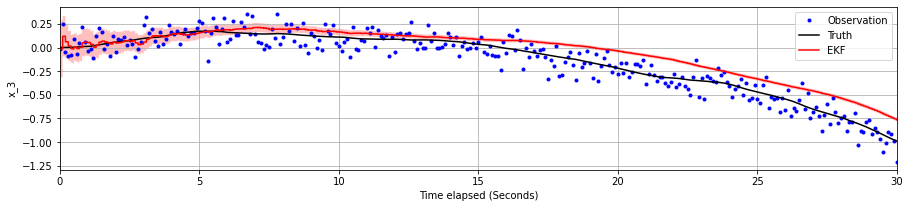

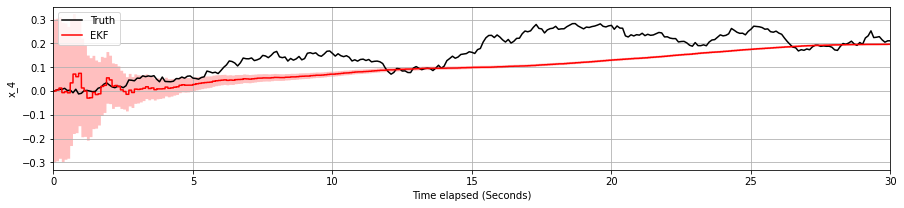

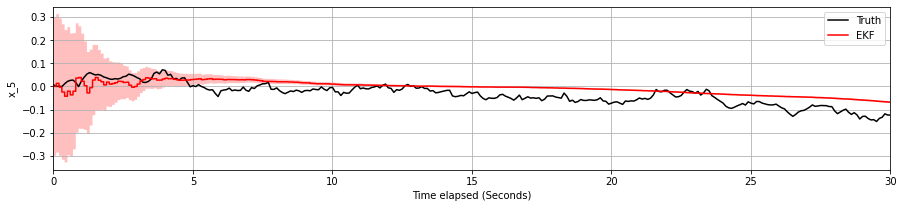

In [328]:
for i in range(mm.nx):
    fig, ax = plt.subplots(figsize=(15,3))
    for k, v in observed.items():
        if v == i:
            ax.plot(t, yobs[k,:], '.b', label='Observation')
    for k, v in truth.items():
        if v == i:
            ax.plot(t, ytrue[k,:], '-k', label='Truth')
    ekf.plot_state(ax, i, 'r', 'filter', linestyle='-', label='EKF')
    #ekf.plot_state(ax, i, 'c', 'smoother', linestyle='-', label='EKS')
    #ukf.plot_state(ax, i, 'g', 'filter', linestyle='-', label='UKF')
    #ekf.plot_state(ax, i, 'g', 'smoother', linestyle='-', label='Smoother')
    #ax.set_xlim([20,40])
    ax.legend()
    ax.grid(True)

IndexError: index 0 is out of bounds for axis 0 with size 0

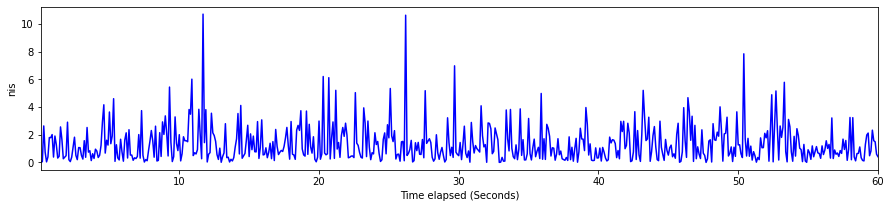

In [42]:
fig, ax = plt.subplots(figsize=(15,3))
mname = 'nis'
ekf.plot_metric(ax, mname, color='b', ftype='filter', label='Filter')
ekf.plot_metric(ax, mname, color='r', ftype='smoother', label='Smoother')
ax.legend()

In [ ]:
np.diag([0,1])